# CAR PRICE PREDICTION

## Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [3]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/Machine-Learning-Projects/datasets/Car Price Prediction.csv')
df.shape

(8128, 12)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


## Data Preprocessing

### Handling Null Values

In [6]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

# Numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create imputer object
imputer = SimpleImputer(strategy='mean')

# Fit and transform
df[num_cols] = imputer.fit_transform(df[num_cols])


In [8]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [14]:
# Convert max_power to numeric first, then fill NaN values
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')
df['max_power'].fillna(df['max_power'].mean(), inplace=True)

C:\Windows\Temp\ipykernel_11000\1975656127.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].mean(), inplace=True)


In [15]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

### Handling Duplicate Items 

In [16]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 1202


In [17]:
# Add small noise to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols] + np.random.normal(0, 1e-6, size=df[numeric_cols].shape)

In [18]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# Duplicacy has beeen removed here 

Number of duplicate rows: 0


### Tackling Categorical data

In [19]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [20]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013.000001,320000.000000,110000.000001,Petrol,Individual,Manual,First Owner,18.499999,1197.000000,82.850000,5.000003
8124,Hyundai Verna CRDi SX,2006.999998,134999.999999,119000.000001,Diesel,Individual,Manual,Fourth & Above Owner,16.800000,1492.999999,110.000000,5.000001
8125,Maruti Swift Dzire ZDi,2009.000001,382000.000002,119999.999998,Diesel,Individual,Manual,First Owner,19.300001,1248.000001,73.900000,5.000001
8126,Tata Indigo CR4,2013.000001,290000.000001,25000.000001,Diesel,Individual,Manual,First Owner,23.569999,1396.000000,70.000001,5.000001
8127,Tata Indigo CR4,2013.000001,290000.000000,25000.000000,Diesel,Individual,Manual,First Owner,23.570001,1396.000000,69.999999,5.000001


In [23]:
# Here, we got the categorical data into a variety of ways so to deal with them we are using different techniques like :
# one hot encoding for some columns,
#  ordinal encoding for owner and
#  max_power is already converted to float in previous cells

# 2. Ordinal encode owner
owner_mapping = {
    'Test Drive Car': 0,
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}
df['owner'] = df['owner'].map(owner_mapping)

# 3. One-hot encode categorical columns
one_hot_cols = ['name', 'fuel', 'seller_type', 'transmission']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

# Check result
print(df.dtypes)
print(df.head())



year                            float64
selling_price                   float64
km_driven                       float64
owner                             int64
mileage(km/ltr/kg)              float64
                                 ...   
fuel_LPG                           bool
fuel_Petrol                        bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
transmission_Manual                bool
Length: 2071, dtype: object
          year  selling_price      km_driven  owner  mileage(km/ltr/kg)  \
0  2014.000001  450000.000001  145500.000000      1           23.400000   
1  2014.000000  370000.000001  119999.999999      2           21.140001   
2  2006.000000  157999.999999  140000.000001      3           17.700001   
3  2010.000001  225000.000000  126999.999997      1           23.000000   
4  2007.000000  130000.000002  119999.999999      1           16.100000   

        engine   max_power     seats  name_Ambassador Classic 2000 DSZ AC PS  \
0

In [24]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: []


### Apply Standardization (Z-score scaling)

In [25]:
numerical_cols_for_scaling = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols_for_scaling.remove('selling_price')
print("Numerical columns for scaling:", numerical_cols_for_scaling)

Numerical columns for scaling: ['year', 'km_driven', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])
df.head()

,year,selling_price,km_driven,owner,mileage(km/ltr/kg),engine,max_power,seats,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,...,name_Volvo XC40 D4 Inscription BSIV,name_Volvo XC40 D4 R-Design,name_Volvo XC60 Inscription D5 BSIV,name_Volvo XC90 T8 Excellence BSIV,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.048465,450000.000001,1.338363,-0.640081,0.999896,-0.423804,-0.495682,-0.440322,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.048464,370000.000001,0.887411,0.753965,0.432290,0.079227,0.339607,-0.440323,False,False,...,False,False,False,False,True,False,False,True,False,True
2,-1.929775,157999.999999,1.241098,2.148011,-0.431678,0.077215,-0.382499,-0.440323,False,False,...,False,False,False,False,False,False,True,True,False,True
3,-0.940655,225000.000000,1.011202,-0.640081,0.899435,-0.126009,-0.042951,-0.440323,False,False,...,False,False,False,False,True,False,False,True,False,True
4,-1.682495,130000.000002,0.887411,-0.640081,-0.833524,-0.323198,-0.093883,-0.440324,False,False,...,False,False,False,False,False,False,True,True,False,True


### Apply Normalization (Min-Max Scaling)

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols_for_scaling] = scaler.fit_transform(df[numerical_cols_for_scaling])
df.head()

,year,selling_price,km_driven,owner,mileage(km/ltr/kg),engine,max_power,seats,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,...,name_Volvo XC40 D4 Inscription BSIV,name_Volvo XC40 D4 R-Design,name_Volvo XC60 Inscription D5 BSIV,name_Volvo XC90 T8 Excellence BSIV,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.837838,450000.000001,0.061640,0.25,0.557143,0.209396,0.1850,0.25,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.837838,370000.000001,0.050837,0.50,0.503333,0.293289,0.2588,0.25,False,False,...,False,False,False,False,True,False,False,True,False,True
2,0.621622,157999.999999,0.059310,0.75,0.421429,0.292953,0.1950,0.25,False,False,...,False,False,False,False,False,False,True,True,False,True
3,0.729730,225000.000000,0.053803,0.25,0.547619,0.259060,0.2250,0.25,False,False,...,False,False,False,False,True,False,False,True,False,True
4,0.648649,130000.000002,0.050837,0.25,0.383333,0.226174,0.2205,0.25,False,False,...,False,False,False,False,False,False,True,True,False,True


### Combine Processed Features

In [28]:
print("Columns after processing:", df.columns.tolist())
print("First 5 rows of the dataframe:")
display(df.head())

Columns after processing: ['year', 'selling_price', 'km_driven', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'name_Ambassador Classic 2000 DSZ AC PS', 'name_Ambassador Grand 1500 DSZ BSIII', 'name_Ambassador Grand 2000 DSZ PW CL', 'name_Ashok Leyland Stile LE', 'name_Audi A3 35 TDI Premium Plus', 'name_Audi A3 40 TFSI Premium', 'name_Audi A4 1.8 TFSI', 'name_Audi A4 2.0 TDI', 'name_Audi A4 2.0 TDI 177 Bhp Premium Plus', 'name_Audi A4 35 TDI Premium Plus', 'name_Audi A6 2.0 TDI', 'name_Audi A6 2.0 TDI  Design Edition', 'name_Audi A6 2.0 TDI Premium Plus', 'name_Audi A6 2.0 TDI Technology', 'name_Audi A6 35 TFSI Matrix', 'name_Audi Q3 2.0 TDI Quattro Premium Plus', 'name_Audi Q3 35 TDI Quattro Premium Plus', 'name_Audi Q3 35 TDI Quattro Technology', 'name_Audi Q5 2.0 TDI', 'name_Audi Q5 3.0 TDI Quattro', 'name_Audi Q5 35TDI Premium Plus', 'name_Audi Q5 45 TDI quattro Technology', 'name_Audi Q7 3.0 TDI Quattro', 'name_Audi Q7 3.0 TDI Quattro Premium Plus', 'name_Audi Q7

,year,selling_price,km_driven,owner,mileage(km/ltr/kg),engine,max_power,seats,name_Ambassador Classic 2000 DSZ AC PS,name_Ambassador Grand 1500 DSZ BSIII,...,name_Volvo XC40 D4 Inscription BSIV,name_Volvo XC40 D4 R-Design,name_Volvo XC60 Inscription D5 BSIV,name_Volvo XC90 T8 Excellence BSIV,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,0.837838,450000.000001,0.061640,0.25,0.557143,0.209396,0.1850,0.25,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.837838,370000.000001,0.050837,0.50,0.503333,0.293289,0.2588,0.25,False,False,...,False,False,False,False,True,False,False,True,False,True
2,0.621622,157999.999999,0.059310,0.75,0.421429,0.292953,0.1950,0.25,False,False,...,False,False,False,False,False,False,True,True,False,True
3,0.729730,225000.000000,0.053803,0.25,0.547619,0.259060,0.2250,0.25,False,False,...,False,False,False,False,True,False,False,True,False,True
4,0.648649,130000.000002,0.050837,0.25,0.383333,0.226174,0.2205,0.25,False,False,...,False,False,False,False,False,False,True,True,False,True


## Training Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X) and target variable (y)
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluation

Evaluation metrics on test set:
MAE     9.533645e+04
MSE     4.890486e+10
RMSE    2.211444e+05
R2      9.253913e-01


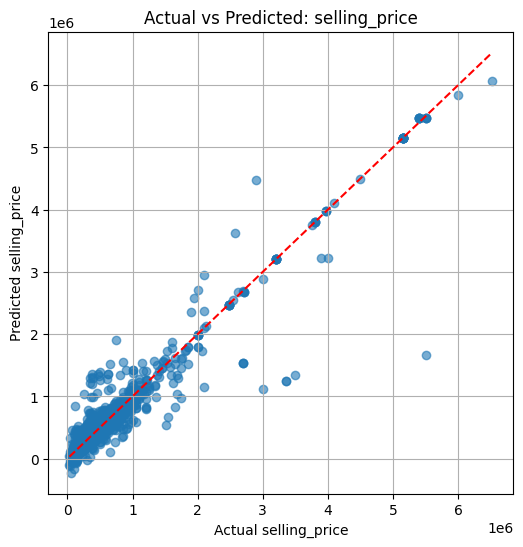

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display metrics
import pandas as pd
metrics = pd.Series({
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2
})
print("Evaluation metrics on test set:")
print(metrics.to_string())

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual selling_price')
plt.ylabel('Predicted selling_price')
plt.title('Actual vs Predicted: selling_price')
plt.grid(True)
plt.show()